In [5]:
import string
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Word Cloud + Top Terms in Discharge Summaries

## Data Sources:
- `NOTEEVENTS.csv`

## Visualization:
- A word cloud and bar plot (regular tokenization and bigram) of the most frequent words/phrases in discharge summaries.

## Why It’s Interesting:
Text data is abundant in MIMIC-III but often underutilized. This provides qualitative insight into the most common clinical themes.


C:\Users\gabek\AppData\Local\Temp\ipykernel_42168\1982020018.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_notes['processed_text'] = filtered_notes['TEXT'].apply(preprocess_text)


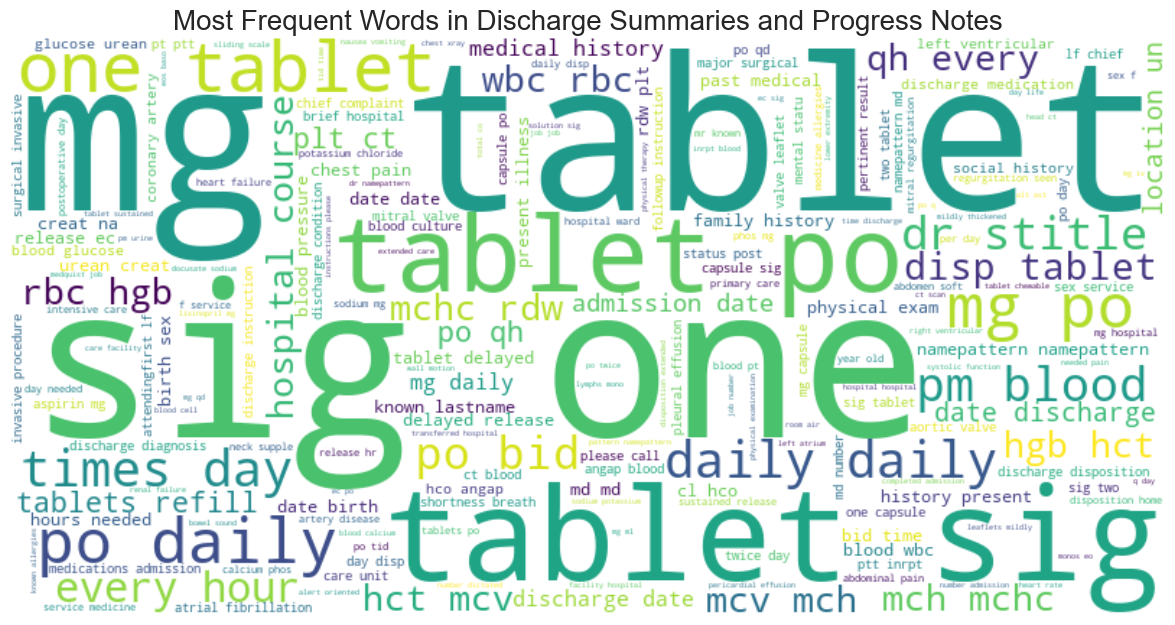

In [6]:
# Import data
notes_df = pd.read_csv('data/NOTEEVENTS.csv', low_memory=False)

# Filter relevant clinical notes
filtered_notes = notes_df[notes_df['CATEGORY'].isin(['Discharge summary', 'Progress Note'])]

# Define/update stop words
stop_words = set(stopwords.words('english'))
additional_stopwords = {'patient', 'said', 'also', 'use', 'would', 'can', 'name', 'last', 'first'}
stop_words.update(additional_stopwords)

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numerical digits
    text = ''.join([char for char in text if not char.isdigit()])
    # Remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply text preprocessing
filtered_notes['processed_text'] = filtered_notes['TEXT'].apply(preprocess_text)

# Combine all processed text
combined_text = ' '.join(filtered_notes['processed_text'].dropna())

# Create and generate a word cloud:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(combined_text)

# Display the word cloud:
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Discharge Summaries and Progress Notes', fontsize=20)
plt.show()


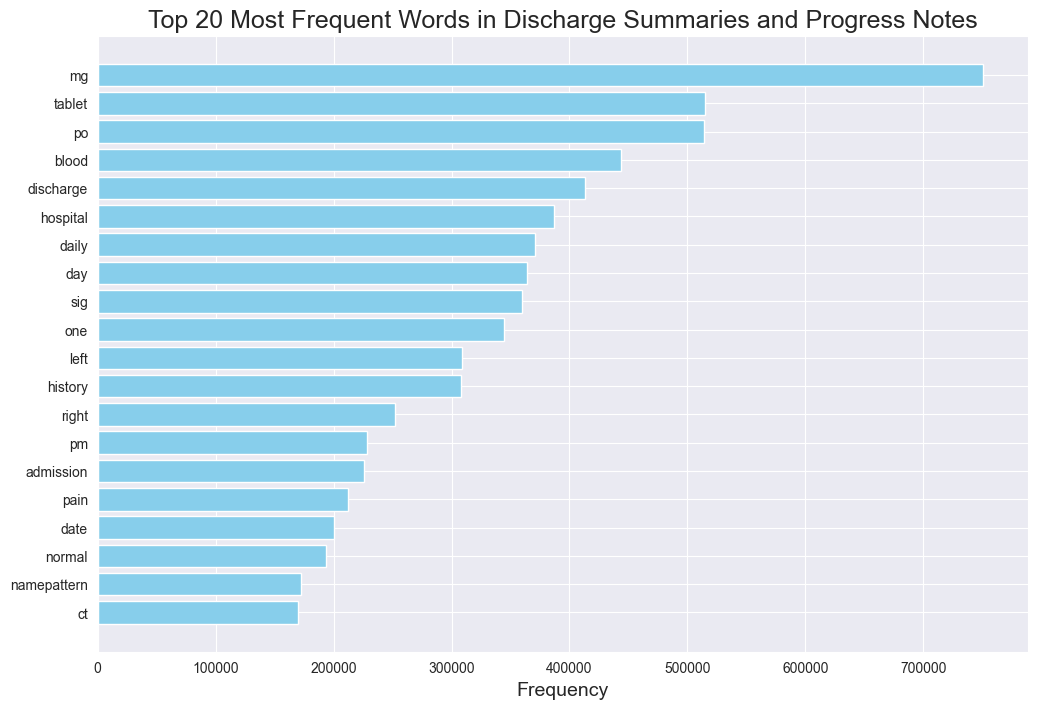

In [7]:
# Tokenize and count word frequencies
word_counts = Counter(combined_text.split())

# Get the top 20 most common words
top_n = 20
common_words = word_counts.most_common(top_n)

# Create a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 8))
plt.barh(common_words_df['word'][::-1], common_words_df['count'][::-1], color='skyblue')
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 20 Most Frequent Words in Discharge Summaries and Progress Notes', fontsize=18)
plt.show()


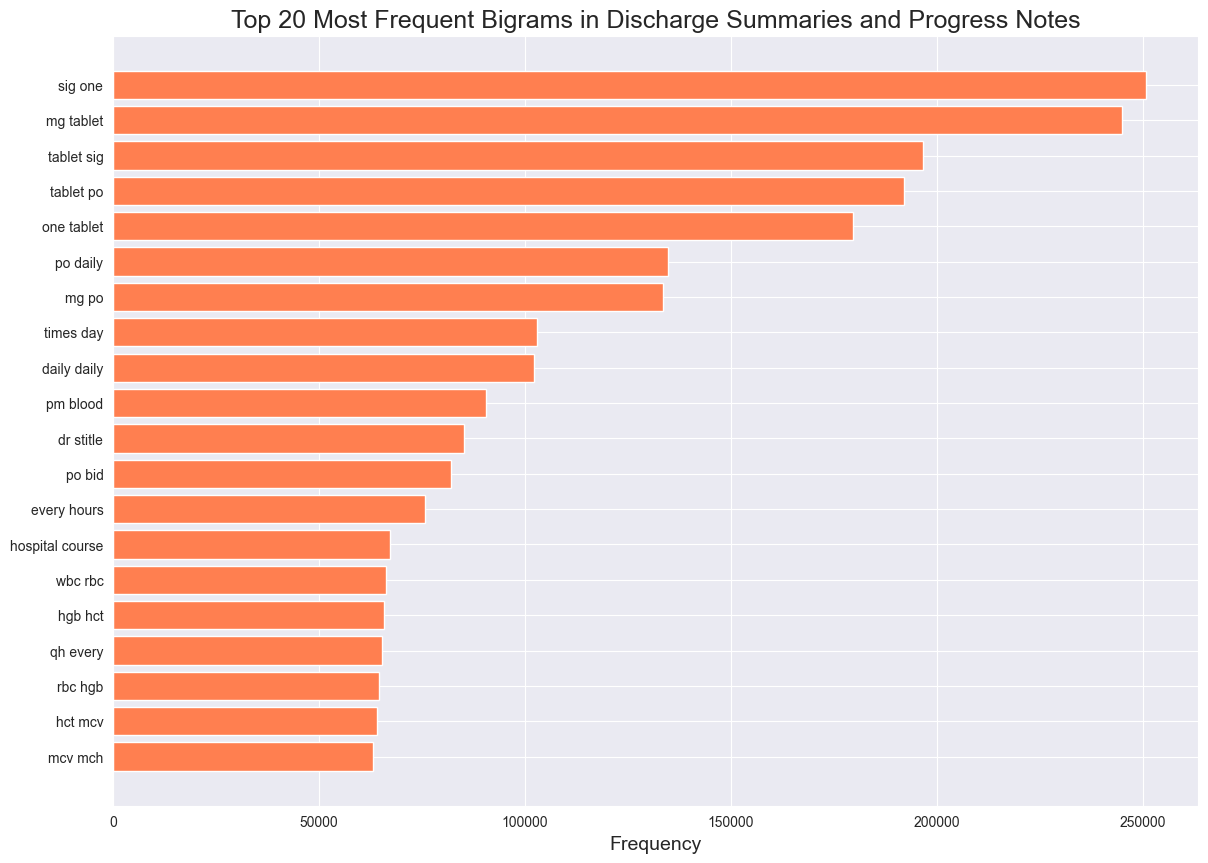

In [8]:
# Define a CountVectorizer for bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=list(stop_words), max_features=100)

# Fit and transform the processed text
bigrams = vectorizer.fit_transform(filtered_notes['processed_text'].dropna())

# Sum the occurrences of each bigram
bigram_counts = bigrams.toarray().sum(axis=0)
bigram_freq = dict(zip(vectorizer.get_feature_names_out(), bigram_counts))

# Get top 20 bigrams
top_bigrams = Counter(bigram_freq).most_common(20)

# Create a DataFrame for plotting
top_bigrams_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])

# Plot
plt.figure(figsize=(14, 10))
plt.barh(top_bigrams_df['bigram'][::-1], top_bigrams_df['count'][::-1], color='coral')
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 20 Most Frequent Bigrams in Discharge Summaries and Progress Notes', fontsize=18)
plt.show()
